---
# 3. Análisis Exploratorio de Datos (EDA) - Consumo Energía Renovable EE.UU.
---
## Objetivos del Notebook
* Explorar visual y estadísticamente el dataset *limpio*.
* Identificar tendencias, patrones y relaciones clave.
* Generar insights sobre el consumo de energía renovable por fuente y sector.
* Formular hipótesis basadas en los datos.


## 3.1. Configuración del Entorno

* Importación de librerías (pandas, numpy, matplotlib, seaborn).

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

* Configuración de estilos de visualización.

In [2]:
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') # Puedes elegir otro estilo que te guste
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de figura por defecto


* Definición de rutas y carga del dataset *procesado*.

In [3]:
try:
    # Ajusta la ruta y el nombre del archivo según sea necesario
    df_processed = pd.read_csv('../data/03_processed/US_Renewable_Energy_Consumption_Cleaned.csv', index_col='Datetime', parse_dates=True)
except FileNotFoundError:
    print("Error: Archivo de datos procesados no encontrado. Asegúrate de haber ejecutado el Notebook 02.")

# Se definen las columnas que se van a graficar
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant','Biomass Losses and Co-products',
    'Biomass Energy','Renewable Diesel Fuel',
    'Other Biofuels','Conventional Hydroelectric Power', 'Biodiesel'
]

## 3.3. Análisis Global de Consumo

**Objetivo:** Entender la tendencia general del consumo total de energía renovable.

**Preguntas:**
* ¿Ha aumentado, disminuido o se ha mantenido estable el consumo total a lo largo del tiempo?
* ¿Existen periodos de crecimiento acelerado o desaceleración?
* ¿Se observa alguna estacionalidad general a simple vista?

* Consumo Total de Energía para cada sector en EU entre 1973 y 2024

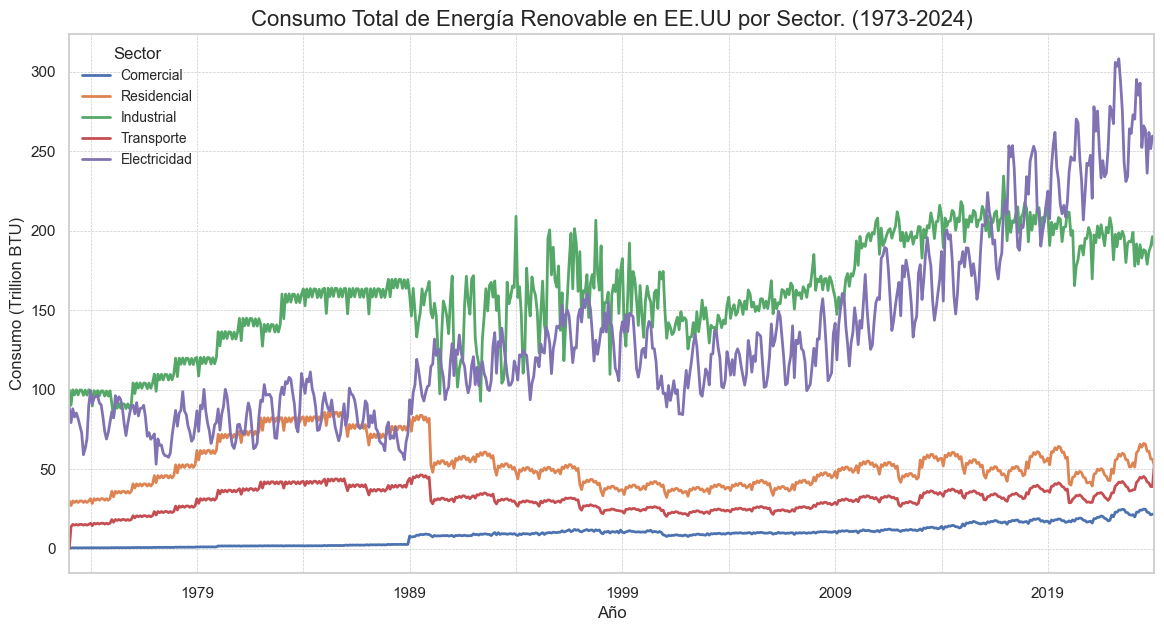

In [17]:
plt.figure(figsize=(14, 7))
df_processed_1 = df_processed['Total Renewable Energy']
df_processed_1[df_processed['Sector'] == 'Commercial'].plot(kind = 'line', linewidth=2, label='Comercial')
df_processed_1[df_processed['Sector'] == 'Residential'].plot(kind = 'line', linewidth=2, label='Residencial')
df_processed_1[df_processed['Sector'] == 'Industrial'].plot(kind = 'line', linewidth=2, label='Industrial')
df_processed_1[df_processed['Sector'] == 'Transportation'].plot(kind = 'line', linewidth=2, label='Transporte')
df_processed_1[df_processed['Sector'] == 'Electric Power'].plot(kind = 'line', linewidth=2, label='Electricidad')
plt.title('Consumo Total de Energía Renovable en EE.UU por Sector. (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sector', fontsize=10)
plt.show()

* Consumo Total Unificado

TypeError: Legend.__init__() got an unexpected keyword argument 'inplace'

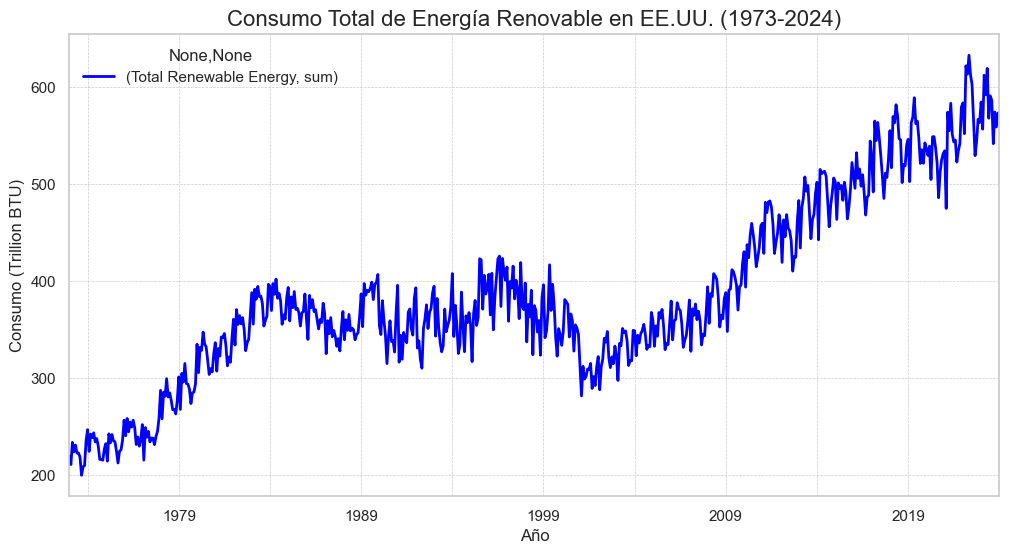

In [20]:
# Se calcula el total de energía renovable consumida por todos los sectores
df_processed_2 = df_processed.groupby(['Datetime']).agg({'Total Renewable Energy': ['sum']})
df_processed_2.plot(kind='line', linewidth=2, color='blue')
plt.title('Consumo Total de Energía Renovable en EE.UU. (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='', fontsize=10, inplace=False)
plt.show()

In [6]:
# Estadísticas descriptivas del total
print("Estadísticas Descriptivas del Consumo Total Calculado:")
print(df_processed['Total Renewable Energy'].describe())

Estadísticas Descriptivas del Consumo Total Calculado:
count    3065.000000
mean       77.072279
std        65.990606
min         0.000000
25%        25.359000
50%        51.017000
75%       126.982000
max       308.175000
Name: Total Renewable Energy, dtype: float64
